# Projeto de Regressão: Predição de Preços de Imóveis com o Conjunto de Dados "Ames"
Objetivo: Desenvolver um modelo de regressão para prever o logaritmo da base 10 dos preços de imóveis utilizando o conjunto de dados "Ames".  
  
**Alunos: Arthur Cisotto, Marlon Pereira**

### 1. Leitura dos dados e importação das bibliotecas

In [523]:
import pickle
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [524]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\tutuc\Dropbox\A - ARTHUR\6oSemestre\ML\Projeto1_MachineLearning_23.2\data


In [525]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [526]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [527]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [528]:
model_data = data.copy()

### 2. Preparação dos dados e Feature Engineering

#### 2.1. Features numéricas
Para as features numéricas, podemos realizar as seguintes operações:
1. **Transformações Logarítmicas**: Para as variáveis que são altamente assimétricas, podemos aplicar transformações logarítmicas para torná-las mais normalmente distribuídas.
2. **Padronização ou Normalização**: Podemos querer padronizar ou normalizar algumas das variáveis para que elas estejam na mesma escala.
3. **Criação de Variáveis Polinomiais**: Variáveis polinomiais podem ser criadas a partir das variáveis existentes, que podem ajudar a capturar relações não lineares.

In [529]:
numeric_features = model_data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold',
       'Yr.Sold', 'SalePrice', 'Garage.Age', 'Remod.Age', 'House.Age'],
      dtype='object')

In [530]:
def plot_numericals(data, cols):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = data.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        data[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

#### `Lot.Frontage`
- Lot Frontage (Continuous): Linear feet of street connected to property

A feature `Lot.Frontage` representa o tamanho da rua conectada à propriedade. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

               count       mean        std   min   25%   50%   75%    max
Lot.Frontage  2877.0  69.202989  21.204969  21.0  60.0  68.0  79.0  313.0


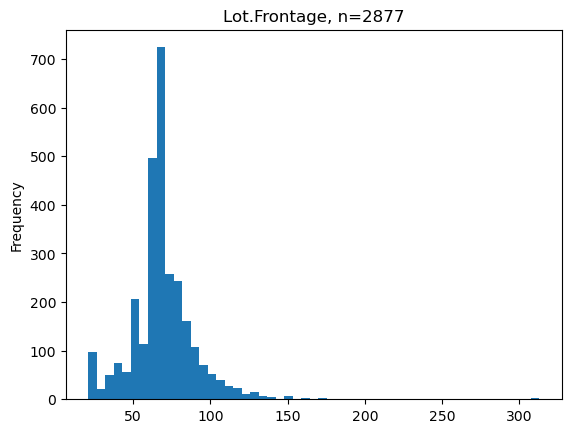

In [531]:
plot_numericals(model_data, ['Lot.Frontage'])

               count      mean       std       min       25%       50%  \
Lot.Frontage  2877.0  1.819277  0.140561  1.322219  1.778151  1.832509   

                   75%       max  
Lot.Frontage  1.897627  2.495544  


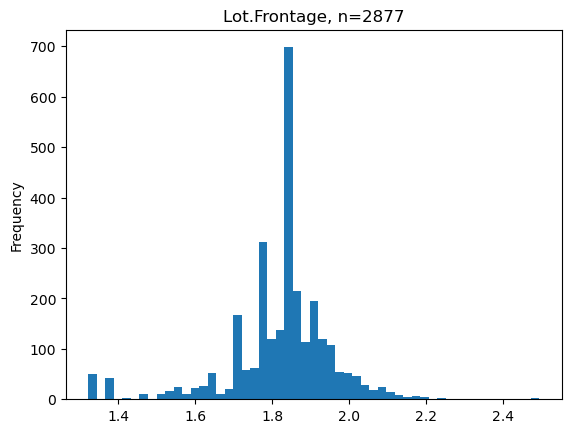

In [532]:
model_data['Lot.Frontage'] = model_data['Lot.Frontage'].apply(np.log10)
plot_numericals(model_data, ['Lot.Frontage'])

#### `Lot.Area`
- Lot Area (Continuous): Lot size in square feet

A feature `Lot.Area` representa o tamanho do lote em pés quadrados. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

           count          mean          std     min     25%     50%      75%  \
Lot.Area  2877.0  10171.366354  7833.442896  1470.0  7500.0  9490.0  11600.0   

               max  
Lot.Area  215245.0  


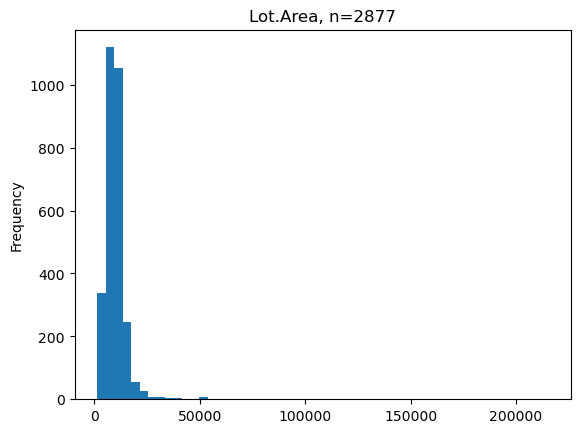

In [533]:
plot_numericals(model_data, ['Lot.Area'])

           count      mean       std       min       25%       50%       75%  \
Lot.Area  2877.0  3.951549  0.218039  3.167317  3.875061  3.977266  4.064458   

               max  
Lot.Area  5.332933  


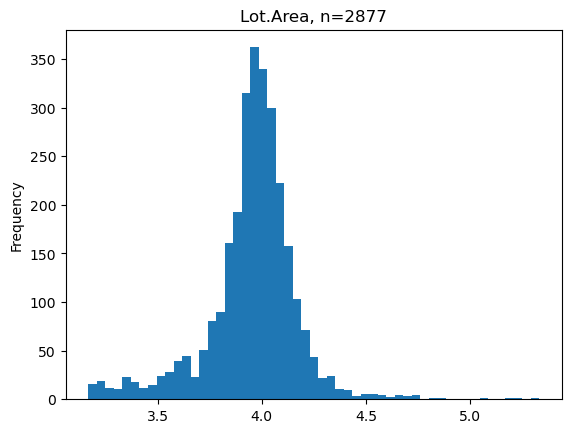

In [534]:
model_data['Lot.Area'] = model_data['Lot.Area'].apply(np.log10)
plot_numericals(model_data, ['Lot.Area'])

#### `Mas.Vnr.Area`
- Mas Vnr Area (Continuous): Masonry veneer area in square feet

A feature `Mas.Vnr.Area` representa a área de alvenaria em pés quadrados. Podemos ver que a distribuição é altamente assimétrica, com uma cauda longa à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída. Se apenas aplicarmos uma transformação logarítmica, teremos um erro, pois existem valores nulos. Portanto, primeiro podemos somar 1 a todos os valores e, em seguida, aplicar a transformação logarítmica.

               count       mean         std  min  25%  50%    75%     max
Mas.Vnr.Area  2877.0  102.87626  179.732526  0.0  0.0  0.0  166.0  1600.0


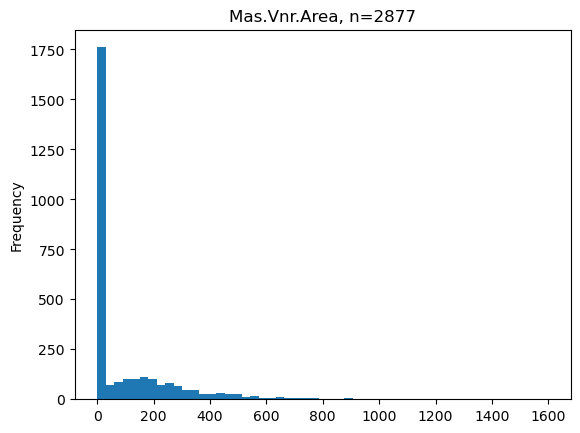

In [535]:
plot_numericals(model_data, ['Mas.Vnr.Area'])

               count      mean       std  min  25%  50%       75%       max
Mas.Vnr.Area  2877.0  0.916184  1.141249  0.0  0.0  0.0  2.222716  3.204391


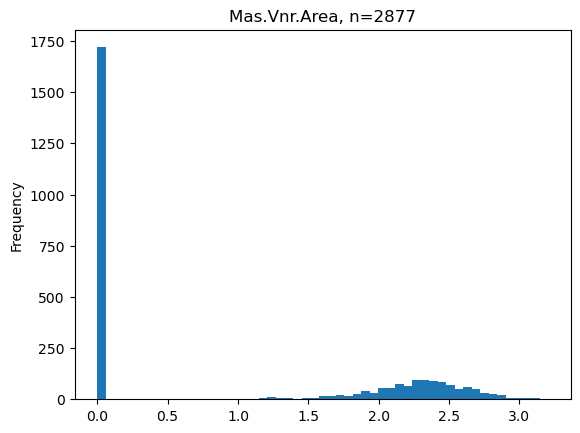

In [536]:
# Adicionando uma constante antes de aplicar o logaritmo
model_data['Mas.Vnr.Area'] = model_data['Mas.Vnr.Area'].apply(lambda x: np.log10(x+1))
plot_numericals(model_data, ['Mas.Vnr.Area'])

Como podemos ver, mesmo depois de aplicar a transformação logarítmica, temos uma distribuição com uma altíssima concentração de valores em 0. Isso pode ser devido ao fato de que muitas casas não têm alvenaria. Portanto, podemos criar uma variável binária que indica se a casa tem ou não alvenaria.

In [537]:
model_data['Has.Mas.Vnr'] = model_data['Mas.Vnr.Area'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Mas.Vnr.Area', axis=1, inplace=True)
model_data['Has.Mas.Vnr'] = model_data['Has.Mas.Vnr'].astype('category')
model_data['Has.Mas.Vnr'].value_counts()



Has.Mas.Vnr
0    1719
1    1158
Name: count, dtype: int64

#### `Total.Bsmt.SF`
- Total Bsmt SF (Continuous): Total square feet of basement area

A feature `Total.Bsmt.SF` representa a área total do porão em pés quadrados. Existem outras features que representam a área do porão, como `BsmtFin.SF.1`, `BsmtFin.SF.2`, `Bsmt.Unf.SF`. Vamos verificar se a soma dessas features é igual à feature `Total.Bsmt.SF`.

In [538]:
aux_data = model_data[['BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF']]
aux_data['AreaTotal'] = aux_data['BsmtFin.SF.1'] + aux_data['BsmtFin.SF.2'] + aux_data['Bsmt.Unf.SF']
aux_data['AreaTotal'].describe()

C:\Users\tutuc\AppData\Local\Temp\ipykernel_13952\1635582252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_data['AreaTotal'] = aux_data['BsmtFin.SF.1'] + aux_data['BsmtFin.SF.2'] + aux_data['Bsmt.Unf.SF']


count    2877.000000
mean     1058.020855
std       439.000776
min         0.000000
25%       796.000000
50%       992.000000
75%      1309.000000
max      6110.000000
Name: AreaTotal, dtype: float64

In [539]:
model_data['Total.Bsmt.SF'].describe()

count    2877.000000
mean     1058.020855
std       439.000776
min         0.000000
25%       796.000000
50%       992.000000
75%      1309.000000
max      6110.000000
Name: Total.Bsmt.SF, dtype: float64

Como podemos ver, a soma das features `BsmtFin.SF.1`, `BsmtFin.SF.2`, `Bsmt.Unf.SF` é igual à feature `Total.Bsmt.SF`. Portanto, podemos excluir essas features e manter apenas a feature `Total.Bsmt.SF`.

In [540]:
model_data.drop(['BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF'], axis=1, inplace=True)

                count         mean         std  min    25%    50%     75%  \
Total.Bsmt.SF  2877.0  1058.020855  439.000776  0.0  796.0  992.0  1309.0   

                  max  
Total.Bsmt.SF  6110.0  


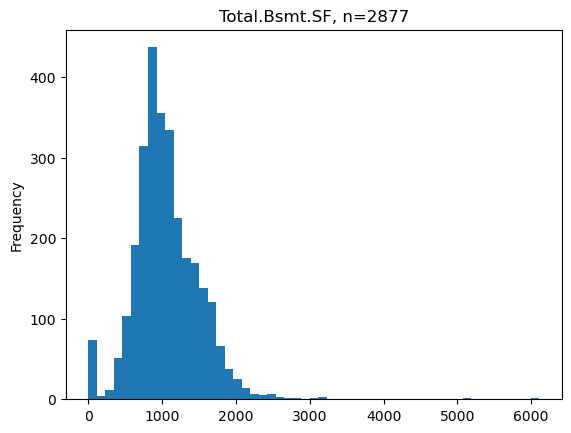

In [541]:
plot_numericals(model_data, ['Total.Bsmt.SF'])

                count      mean       std  min       25%       50%       75%  \
Total.Bsmt.SF  2877.0  2.930682  0.499071  0.0  2.901458  2.996949  3.117271   

                    max  
Total.Bsmt.SF  3.786112  


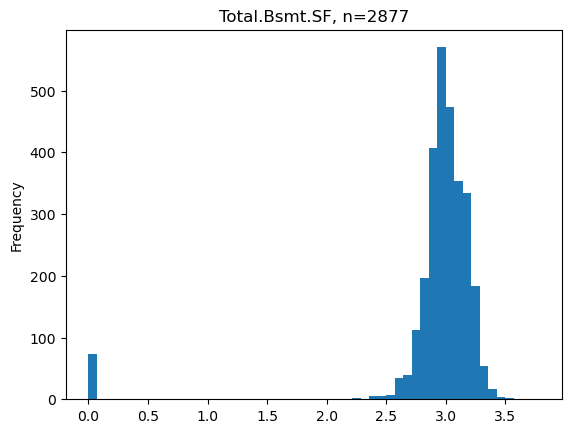

In [542]:
model_data['Total.Bsmt.SF'] = model_data['Total.Bsmt.SF'].apply(lambda x: np.log10(x+1))
plot_numericals(model_data, ['Total.Bsmt.SF'])

Como podemos ver, a distribuição contém alguns valores em 0. Podemos criar uma variável binária que indica se a casa tem ou não porão.

In [543]:
model_data['Has.Bsmt'] = model_data['Total.Bsmt.SF'].apply(lambda x: 1 if x > 0 else 0)
model_data['Has.Bsmt'] = model_data['Has.Bsmt'].astype('category')
model_data['Has.Bsmt'].value_counts()

Has.Bsmt
1    2804
0      73
Name: count, dtype: int64

A quantidade de casas sem porão é muito pequena, será que vale a pena criar uma variável binária para isso? Vamos verificar se existe alguma relação entre a feature `Total.Bsmt.SF` e a feature `SalePrice`.

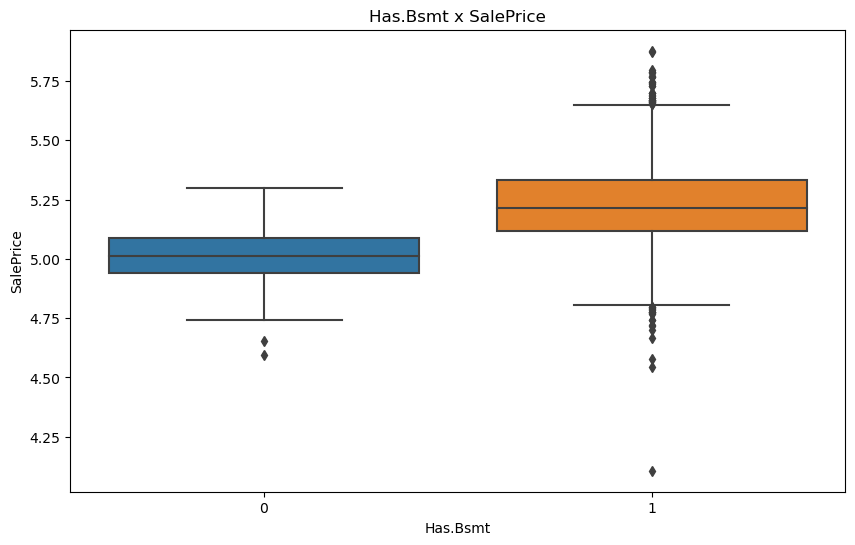

In [544]:
plt.figure(figsize=(10, 6))
plt.title('Has.Bsmt x SalePrice')
sns.boxplot(x='Has.Bsmt', y='SalePrice', data=model_data)
plt.show()



Parece que existe uma relação entre a casa ter porão e o preço de venda. No entanto, a relação é muito fraca pra justificar manter ela com uma distribuição tão desigual entre as classes. Portanto, podemos excluir a feature `Has.Bsmt`.

In [545]:
model_data.drop('Has.Bsmt', axis=1, inplace=True)

#### `X1st.Flr.SF`
- 1st Flr SF (Continuous): First Floor square feet

A feature `X1st.Flr.SF` representa a área do primeiro andar em pés quadrados. Podemos ver que a distribuição é assimétrica. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

              count         mean         std    min    25%     50%     75%  \
X1st.Flr.SF  2877.0  1163.242614  389.081826  334.0  880.0  1088.0  1392.0   

                max  
X1st.Flr.SF  5095.0  


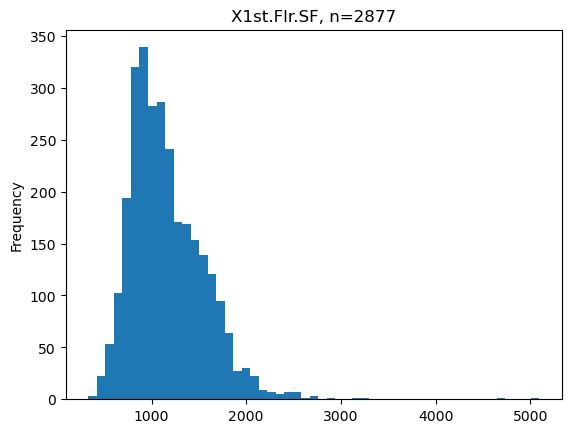

In [546]:
plot_numericals(model_data, ['X1st.Flr.SF'])

              count      mean     std       min       25%       50%       75%  \
X1st.Flr.SF  2877.0  3.043231  0.1391  2.523746  2.944483  3.036629  3.143639   

                  max  
X1st.Flr.SF  3.707144  


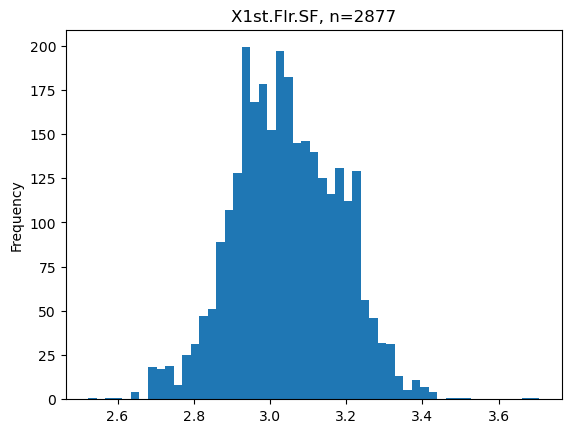

In [547]:
model_data['X1st.Flr.SF'] = model_data['X1st.Flr.SF'].apply(np.log10)
plot_numericals(model_data, ['X1st.Flr.SF'])

#### `X2nd.Flr.SF`
- 2nd Flr SF (Continuous): Second floor square feet
  
A feature `X2nd.Flr.SF` representa a área do segundo andar em pés quadrados. Podemos ver que existem muitos valores em 0. Portanto, podemos criar uma variável binária que indica se a casa tem ou não segundo andar.

              count      mean        std  min  25%  50%    75%     max
X2nd.Flr.SF  2877.0  336.9496  429.84432  0.0  0.0  0.0  708.0  2065.0


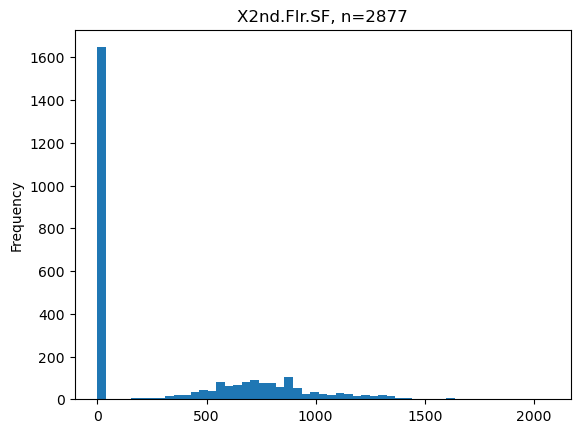

In [548]:
plot_numericals(model_data, ['X2nd.Flr.SF'])

In [549]:
model_data['Has.2nd.Flr'] = model_data['X2nd.Flr.SF'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('X2nd.Flr.SF', axis=1, inplace=True)
model_data['Has.2nd.Flr'] = model_data['Has.2nd.Flr'].astype('category')
model_data['Has.2nd.Flr'].value_counts()


Has.2nd.Flr
0    1647
1    1230
Name: count, dtype: int64

#### `Low.Qual.Fin.SF`
- Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

A feature `Low.Qual.Fin.SF` representa a área de baixa qualidade em pés quadrados. Podemos ver que aparentemente todos os valores são 0. Será que vale a pena manter essa feature? Vamos verificar se existe alguma relação entre a feature `Low.Qual.Fin.SF` e a feature `SalePrice`.

                  count      mean        std  min  25%  50%  75%     max
Low.Qual.Fin.SF  2877.0  4.584637  45.759563  0.0  0.0  0.0  0.0  1064.0


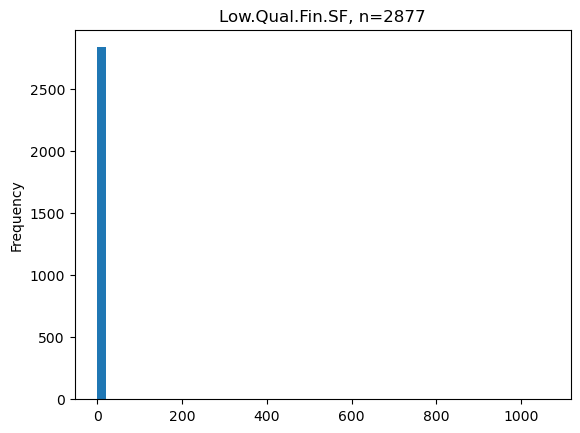

In [550]:
plot_numericals(model_data, ['Low.Qual.Fin.SF'])

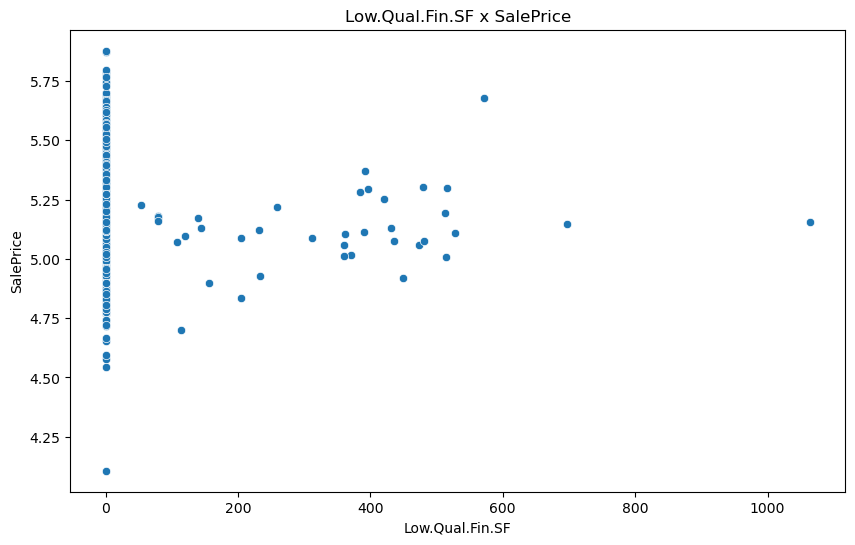

In [551]:
plt.figure(figsize=(10, 6))
plt.title('Low.Qual.Fin.SF x SalePrice')
sns.scatterplot(x='Low.Qual.Fin.SF', y='SalePrice', data=model_data)
plt.show()


Aparentemente não existe nenhuma relação entre a feature `Low.Qual.Fin.SF` e a feature `SalePrice`. Portanto, podemos excluir a feature `Low.Qual.Fin.SF`.

In [552]:
model_data.drop('Low.Qual.Fin.SF', axis=1, inplace=True)

#### `Gr.Liv.Area`
- Gr Liv Area (Continuous): Above grade (ground) living area square feet

A feature `Gr.Liv.Area` representa a área de estar acima do nível do solo em pés quadrados. Podemos ver que a distribuição é assimétrica. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

              count         mean         std    min     25%     50%     75%  \
Gr.Liv.Area  2877.0  1504.776851  504.110021  334.0  1132.0  1452.0  1750.0   

                max  
Gr.Liv.Area  5642.0  


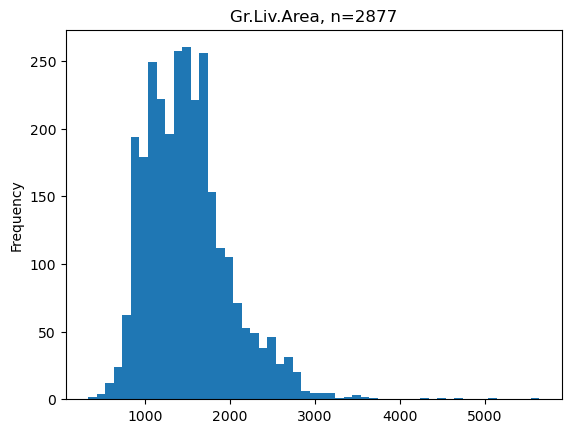

In [553]:
plot_numericals(model_data, ['Gr.Liv.Area'])

              count      mean       std       min       25%       50%  \
Gr.Liv.Area  2877.0  3.154748  0.140278  2.523746  3.053846  3.161967   

                  75%       max  
Gr.Liv.Area  3.243038  3.751433  


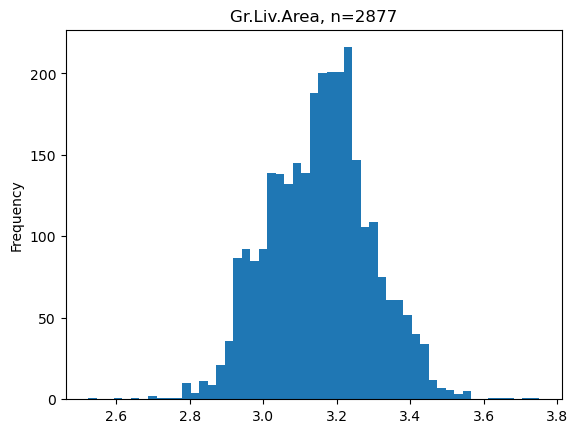

In [554]:
model_data['Gr.Liv.Area'] = model_data['Gr.Liv.Area'].apply(np.log10)
plot_numericals(model_data, ['Gr.Liv.Area'])

#### `Bsmt.Full.Bath`
- Bsmt Full Bath (Discrete): Basement full bathrooms

A feature `Bsmt.Full.Bath` representa a quantidade de banheiros completos no porão. Podemos ver que apesar de ser uma feature discreta, ela tem apenas 3 valores possíveis. Portanto, podemos transformá-la em uma feature categórica. Além disso, quase nenhuma casa tem 2 banheiros completos no porão, a maioria tem 0 ou 1. Portanto, podemos criar uma variável binária que indica se a casa tem ou não banheiro completo no porão.

                 count      mean       std  min  25%  50%  75%  max
Bsmt.Full.Bath  2877.0  0.433785  0.525642  0.0  0.0  0.0  1.0  3.0


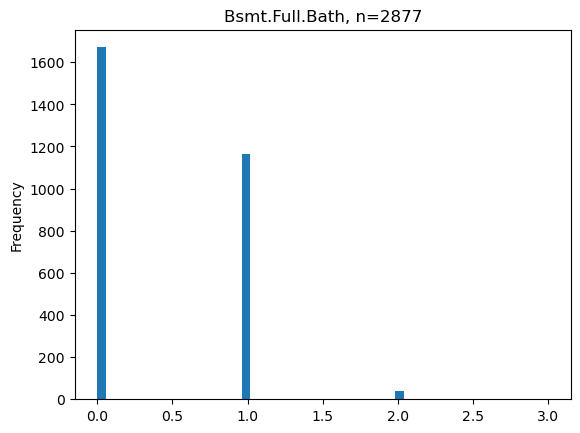

In [555]:
plot_numericals(model_data, ['Bsmt.Full.Bath'])

In [556]:
model_data['Has.Bsmt.Full.Bath'] = model_data['Bsmt.Full.Bath'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Bsmt.Full.Bath', axis=1, inplace=True)
model_data['Has.Bsmt.Full.Bath'] = model_data['Has.Bsmt.Full.Bath'].astype('category')
model_data['Has.Bsmt.Full.Bath'].value_counts()

Has.Bsmt.Full.Bath
0    1671
1    1206
Name: count, dtype: int64

#### `Bsmt.Half.Bath`
- Bsmt Half Bath (Discrete): Basement half bathrooms

A feature `Bsmt.Half.Bath` representa a quantidade de banheiros pela metade no porão. Podemos ver que praticamente todas as casas não têm banheiro pela metade no porão. Será que vale a pena manter essa feature? Vamos verificar se existe alguma relação entre a feature `Bsmt.Half.Bath` e a feature `SalePrice`.

                 count     mean       std  min  25%  50%  75%  max
Bsmt.Half.Bath  2877.0  0.06187  0.246666  0.0  0.0  0.0  0.0  2.0


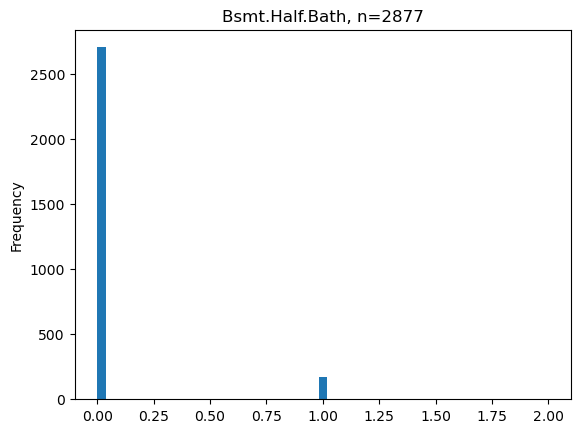

In [557]:
plot_numericals(model_data, ['Bsmt.Half.Bath'])

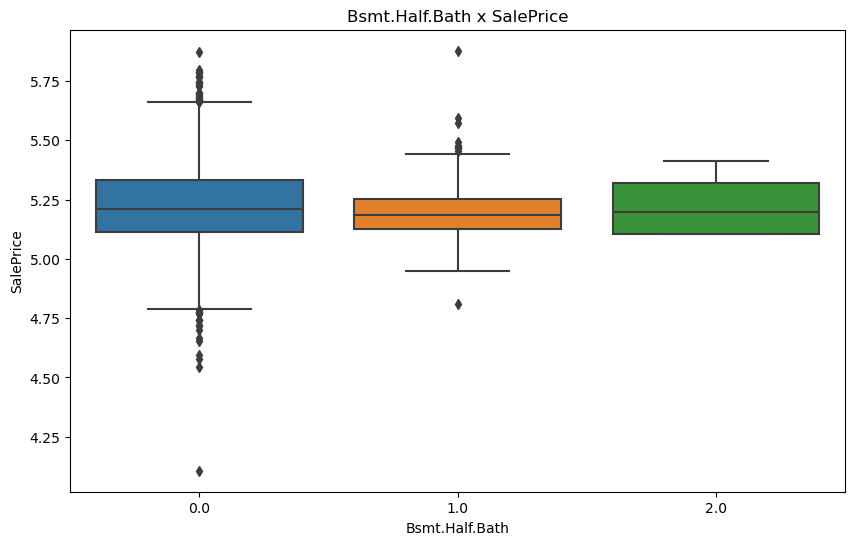

In [558]:
plt.figure(figsize=(10, 6))
plt.title('Bsmt.Half.Bath x SalePrice')
sns.boxplot(x='Bsmt.Half.Bath', y='SalePrice', data=model_data)
plt.show()


Aparentemente não existe nenhuma relação entre a feature `Bsmt.Half.Bath` e a feature `SalePrice`. Portanto, podemos excluir a feature `Bsmt.Half.Bath`.

In [559]:
model_data.drop('Bsmt.Half.Bath', axis=1, inplace=True)

#### `Full.Bath`
- Full Bath (Discrete): Full bathrooms above grade

A feature `Full.Bath` representa a quantidade de banheiros completos acima do nível do solo. Podemos ver que apesar de ser uma feature discreta, ela tem apenas 5 valores possíveis. Portanto, podemos transformá-la em uma feature categórica.

            count      mean       std  min  25%  50%  75%  max
Full.Bath  2877.0  1.573514  0.551803  0.0  1.0  2.0  2.0  4.0


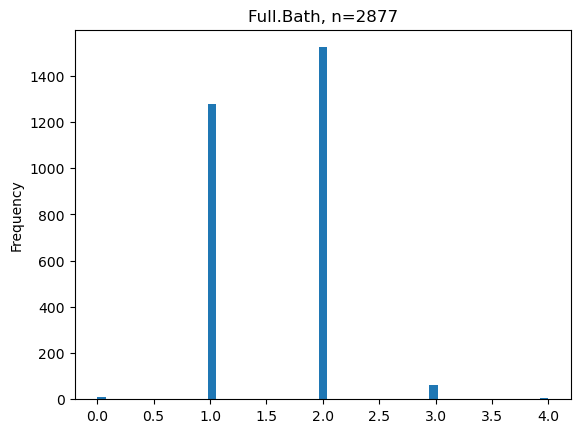

In [560]:
plot_numericals(model_data, ['Full.Bath'])

In [561]:
model_data['Full.Bath'] = model_data['Full.Bath'].astype('category')

#### `Half.Bath`
- Half Bath (Discrete): Half baths above grade

A feature `Half.Bath` representa a quantidade de banheiros pela metade acima do nível do solo. Podemos ver que apesar de ser uma feature discreta, ela tem apenas 3 valores possíveis. Portanto, podemos transformá-la em uma feature categórica. Além disso, quase nenhuma casa tem 2 banheiros pela metade acima do nível do solo, a maioria tem 0 ou 1. Portanto, podemos criar uma variável binária que indica se a casa tem ou não banheiro pela metade acima do nível do solo.

            count     mean       std  min  25%  50%  75%  max
Half.Bath  2877.0  0.38269  0.503692  0.0  0.0  0.0  1.0  2.0


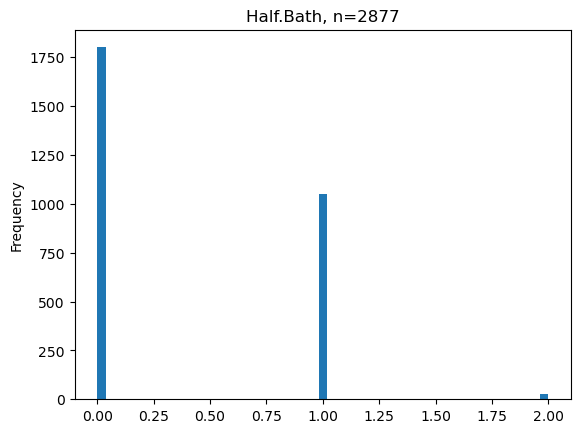

In [562]:
plot_numericals(model_data, ['Half.Bath'])

In [563]:
model_data['Has.Half.Bath'] = model_data['Half.Bath'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Half.Bath', axis=1, inplace=True)
model_data['Has.Half.Bath'] = model_data['Has.Half.Bath'].astype('category')
model_data['Has.Half.Bath'].value_counts()

Has.Half.Bath
0    1801
1    1076
Name: count, dtype: int64

<Axes: title={'center': 'Has.Half.Bath x SalePrice'}, xlabel='Has.Half.Bath', ylabel='SalePrice'>

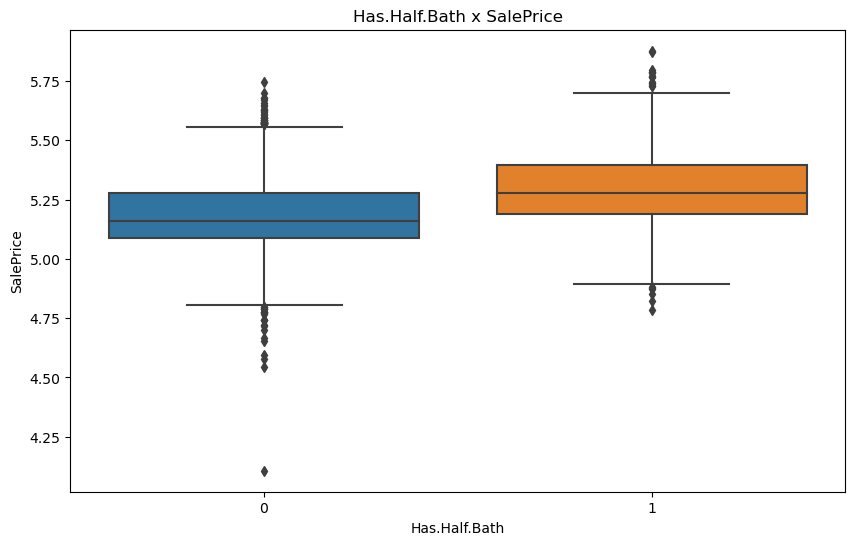

In [564]:
plt.figure(figsize=(10, 6))
plt.title('Has.Half.Bath x SalePrice')
sns.boxplot(x='Has.Half.Bath', y='SalePrice', data=model_data)

#### `Bedroom.AbvGr`
- Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

A feature `Bedroom.AbvGr` representa a quantidade de quartos acima do nível do solo. Podemos ver que apesar de ser uma feature discreta, ela tem apenas 9 valores possíveis. Portanto, podemos transformá-la em uma feature categórica.

                count      mean       std  min  25%  50%  75%  max
Bedroom.AbvGr  2877.0  2.866875  0.819616  0.0  2.0  3.0  3.0  8.0


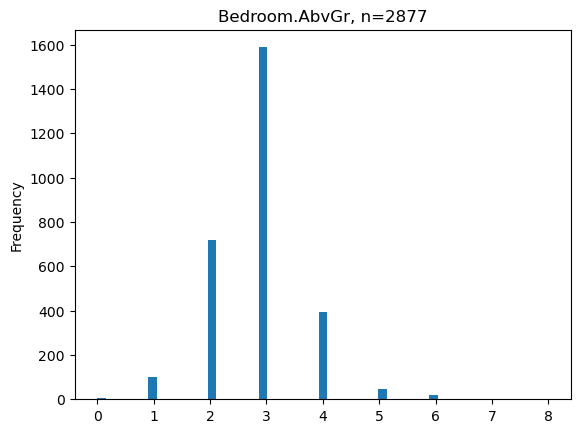

In [565]:
plot_numericals(model_data, ['Bedroom.AbvGr'])

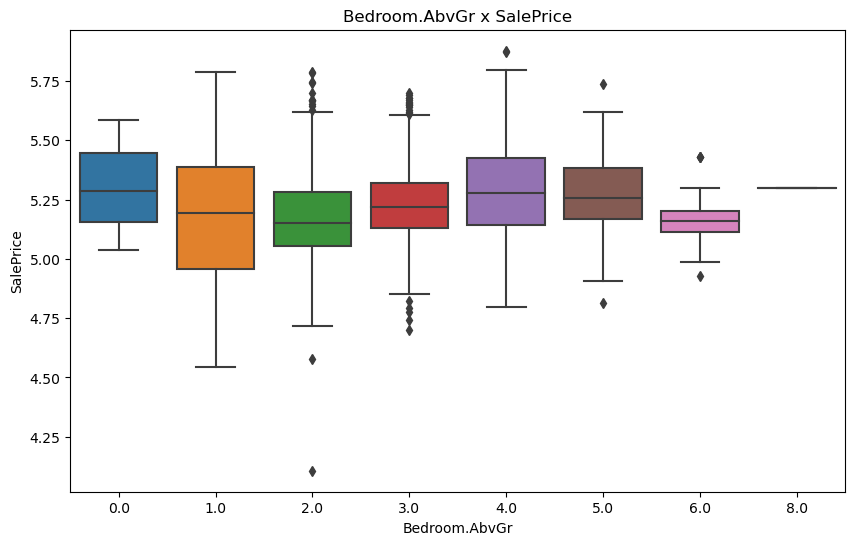

In [566]:
plt.figure(figsize=(10, 6))
plt.title('Bedroom.AbvGr x SalePrice')
sns.boxplot(x='Bedroom.AbvGr', y='SalePrice', data=model_data)
plt.show()

In [567]:
model_data['Bedroom.AbvGr'] = model_data['Bedroom.AbvGr'].astype('category')

#### `Kitchen.AbvGr`
- Kitchen (Discrete): Kitchens above grade

A feature `Bedroom.AbvGr` representa a quantidade de quartos acima do nível do solo. Podemos ver que praticamente todas as casas têm apenas 1 cozinha acima do nível do solo. Portanto, podemos excluir a feature `Kitchen.AbvGr`.

                count      mean       std  min  25%  50%  75%  max
Kitchen.AbvGr  2877.0  1.044143  0.213744  0.0  1.0  1.0  1.0  3.0


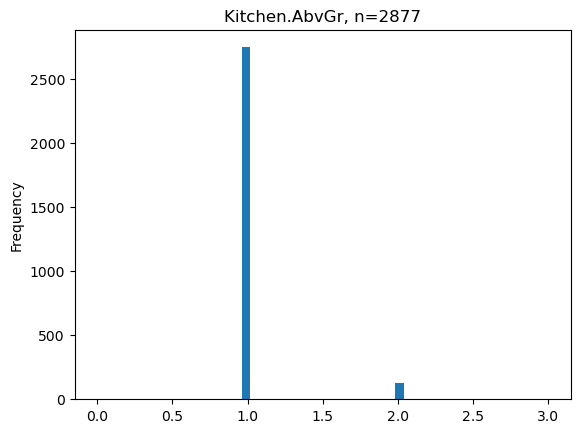

In [568]:
plot_numericals(model_data, ['Kitchen.AbvGr'])

In [569]:
model_data.drop('Kitchen.AbvGr', axis=1, inplace=True)

#### `TotRms.AbvGrd`
- TotRms AbvGrd (Discrete): Total rooms above grade (does not include bathrooms)

A feature `TotRms.AbvGrd` representa a quantidade total de quartos acima do nível do solo.

                count      mean       std  min  25%  50%  75%   max
TotRms.AbvGrd  2877.0  6.463677  1.566941  2.0  5.0  6.0  7.0  15.0


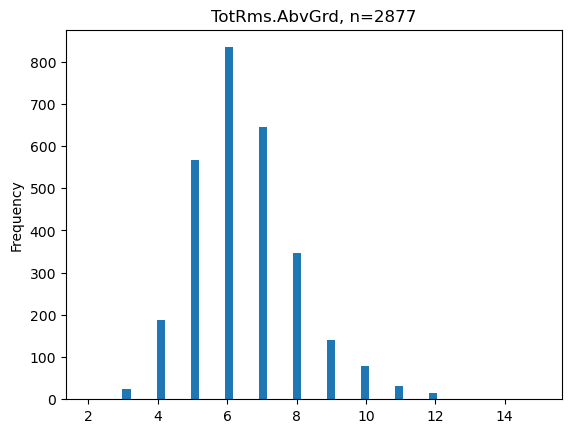

In [570]:
plot_numericals(model_data, ['TotRms.AbvGrd'])

#### `Fireplaces`
- Fireplaces (Discrete): Number of fireplaces

Podemos ver que apesar de ser uma feature discreta, ela tem apenas 5 valores possíveis. Portanto, podemos transformá-la em uma feature categórica. Além disso, quase nenhuma casa tem 2 ou mais lareiras, a maioria tem 0 ou 1. Portanto, podemos criar uma variável binária que indica se a casa tem ou não lareira.

             count      mean       std  min  25%  50%  75%  max
Fireplaces  2877.0  0.601321  0.646945  0.0  0.0  1.0  1.0  4.0


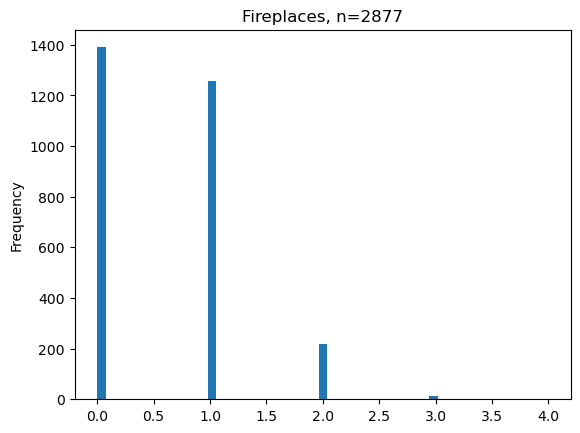

In [571]:
plot_numericals(model_data, ['Fireplaces'])

In [572]:
model_data['Has.Fireplace'] = model_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Fireplaces', axis=1, inplace=True)
model_data['Has.Fireplace'] = model_data['Has.Fireplace'].astype('category')
model_data['Has.Fireplace'].value_counts()

Has.Fireplace
1    1487
0    1390
Name: count, dtype: int64

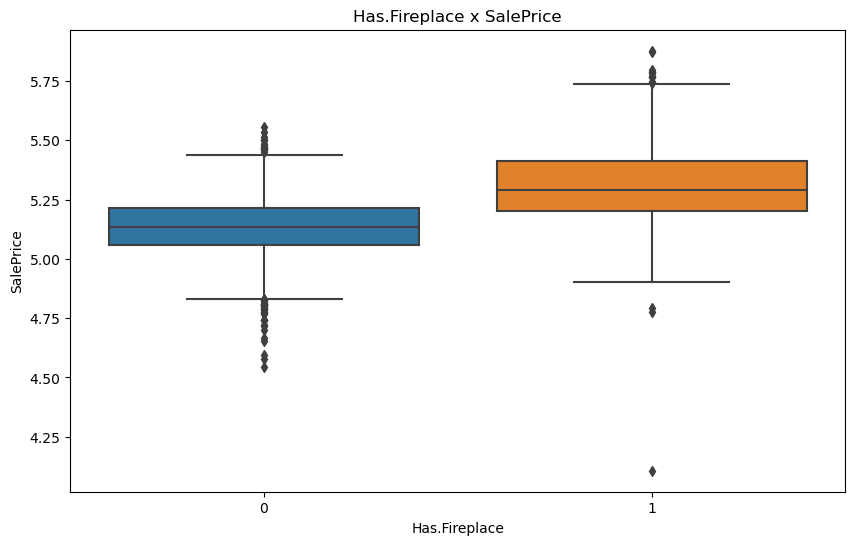

In [573]:
plt.figure(figsize=(10, 6))
plt.title('Has.Fireplace x SalePrice')
sns.boxplot(x='Has.Fireplace', y='SalePrice', data=model_data)
plt.show()

#### `Garage.Area`
- Garage Area (Continuous): Size of garage in square feet

A feature `Garage.Area` representa o tamanho da garagem em pés quadrados. Podemos ver que a distribuição é assimétrica, com uma cauda à direita. Podemos aplicar uma transformação logarítmica para torná-la mais normalmente distribuída.

              count        mean         std  min    25%    50%    75%     max
Garage.Area  2877.0  474.941606  214.027308  0.0  326.0  480.0  576.0  1488.0


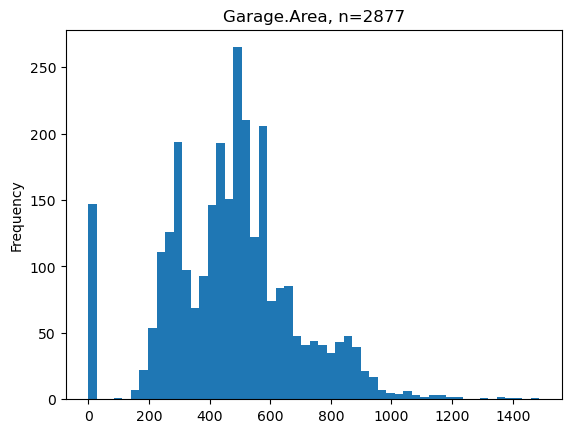

In [574]:
plot_numericals(model_data, ['Garage.Area'])

              count      mean       std  min       25%       50%       75%  \
Garage.Area  2877.0  2.533244  0.609702  0.0  2.514548  2.682145  2.761176   

                  max  
Garage.Area  3.172895  


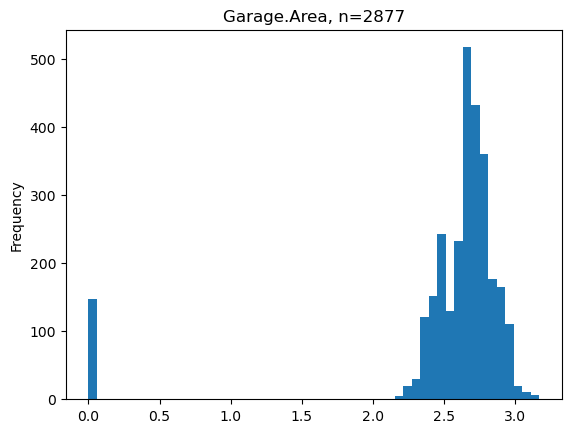

In [575]:
model_data['Garage.Area'] = model_data['Garage.Area'].apply(lambda x: np.log10(x+1))
plot_numericals(model_data, ['Garage.Area'])

#### `Wood.Deck.SF`
- Wood Deck SF (Continuous): Wood deck area in square feet

A feature `Wood.Deck.SF` representa a área do deck de madeira em pés quadrados. Podemos ver que existem muitos valores em 0. Portanto, podemos criar uma variável binária que indica se a casa tem ou não deck de madeira.

               count       mean         std  min  25%  50%    75%     max
Wood.Deck.SF  2877.0  94.297185  126.993526  0.0  0.0  0.0  168.0  1424.0


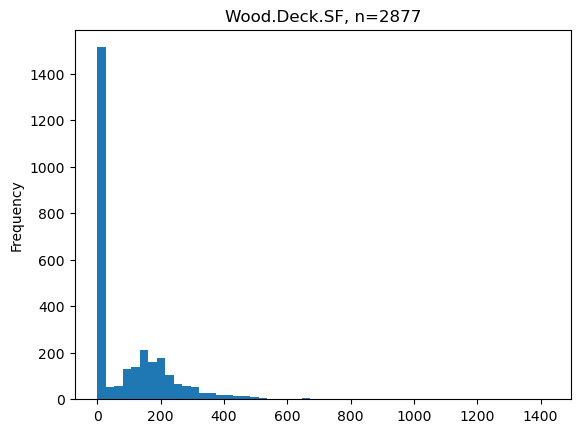

In [576]:
plot_numericals(model_data, ['Wood.Deck.SF'])

In [577]:
model_data['Has.Wood.Deck'] = model_data['Wood.Deck.SF'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Wood.Deck.SF', axis=1, inplace=True)
model_data['Has.Wood.Deck'] = model_data['Has.Wood.Deck'].astype('category')
model_data['Has.Wood.Deck'].value_counts()

Has.Wood.Deck
0    1496
1    1381
Name: count, dtype: int64

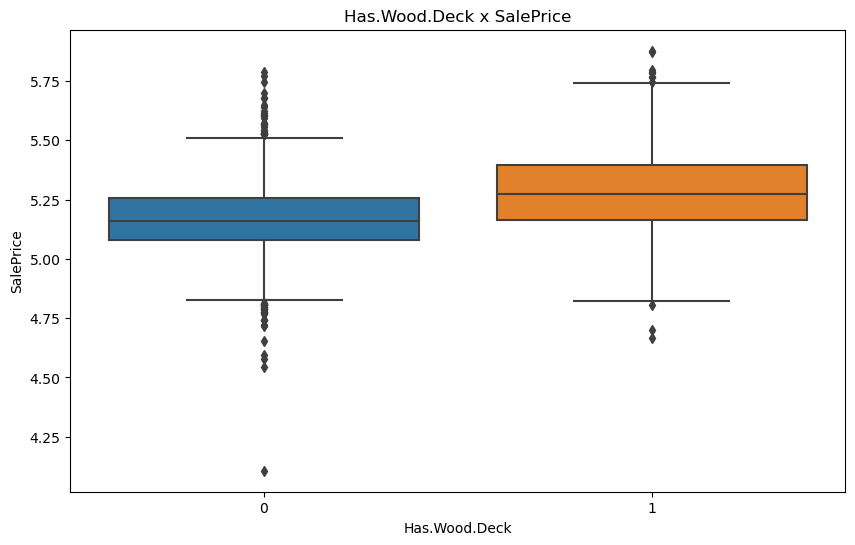

In [578]:
plt.figure(figsize=(10, 6))
plt.title('Has.Wood.Deck x SalePrice')
sns.boxplot(x='Has.Wood.Deck', y='SalePrice', data=model_data)
plt.show()

#### `Open.Porch.SF`
- Open Porch SF (Continuous): Open porch area in square feet

A feature `Open.Porch.SF` representa a área da varanda aberta em pés quadrados. Podemos ver que existem muitos valores em 0. Portanto, podemos criar uma variável binária que indica se a casa tem ou não varanda aberta.

                count       mean        std  min  25%   50%   75%    max
Open.Porch.SF  2877.0  47.546403  66.613621  0.0  0.0  27.0  70.0  742.0


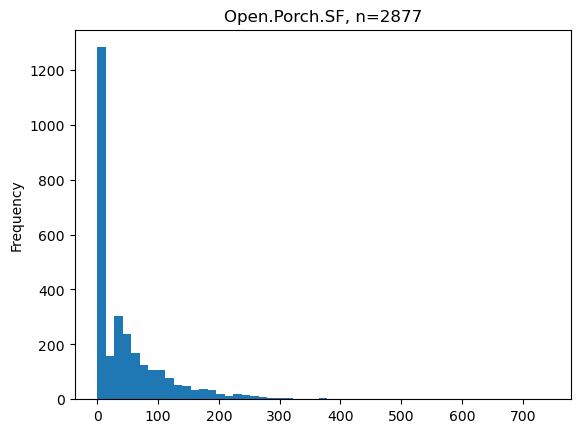

In [579]:
plot_numericals(model_data, ['Open.Porch.SF'])

In [580]:
model_data['Has.Open.Porch'] = model_data['Open.Porch.SF'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Open.Porch.SF', axis=1, inplace=True)
model_data['Has.Open.Porch'] = model_data['Has.Open.Porch'].astype('category')
model_data['Has.Open.Porch'].value_counts()

Has.Open.Porch
1    1608
0    1269
Name: count, dtype: int64

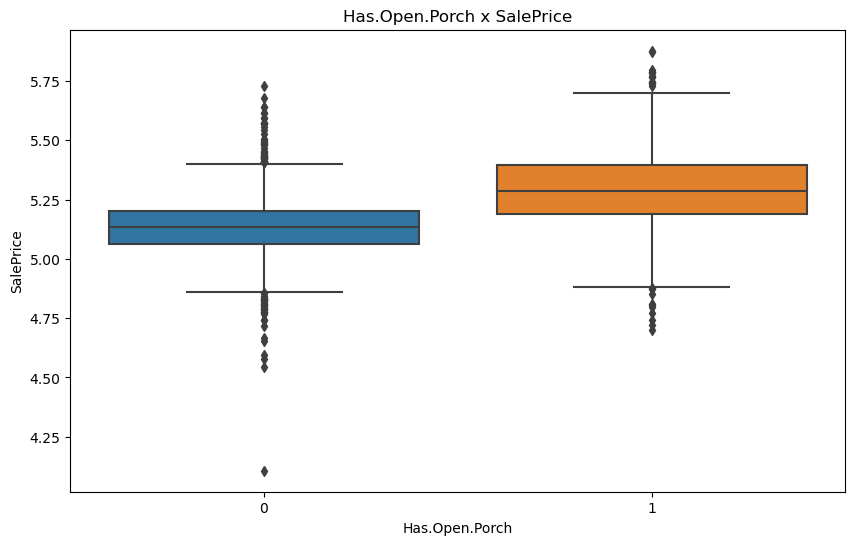

In [581]:
plt.figure(figsize=(10, 6))
plt.title('Has.Open.Porch x SalePrice')
sns.boxplot(x='Has.Open.Porch', y='SalePrice', data=model_data)
plt.show()

#### `Enclosed.Porch`
- Enclosed Porch (Continuous): Enclosed porch area in square feet

A feature `Enclosed.Porch` representa a área da varanda fechada em pés quadrados. Podemos ver que existem muitos valores em 0. Portanto, podemos criar uma variável binária que indica se a casa tem ou não varanda fechada.

                 count       mean        std  min  25%  50%  75%     max
Enclosed.Porch  2877.0  22.634341  63.912202  0.0  0.0  0.0  0.0  1012.0


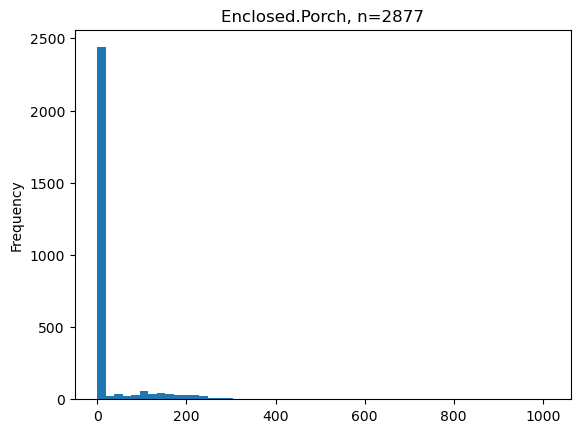

In [582]:
plot_numericals(model_data, ['Enclosed.Porch'])

In [583]:
model_data['Has.Enclosed.Porch'] = model_data['Enclosed.Porch'].apply(lambda x: 1 if x > 0 else 0)
model_data.drop('Enclosed.Porch', axis=1, inplace=True)
model_data['Has.Enclosed.Porch'] = model_data['Has.Enclosed.Porch'].astype('category')
model_data['Has.Enclosed.Porch'].value_counts()

Has.Enclosed.Porch
0    2435
1     442
Name: count, dtype: int64

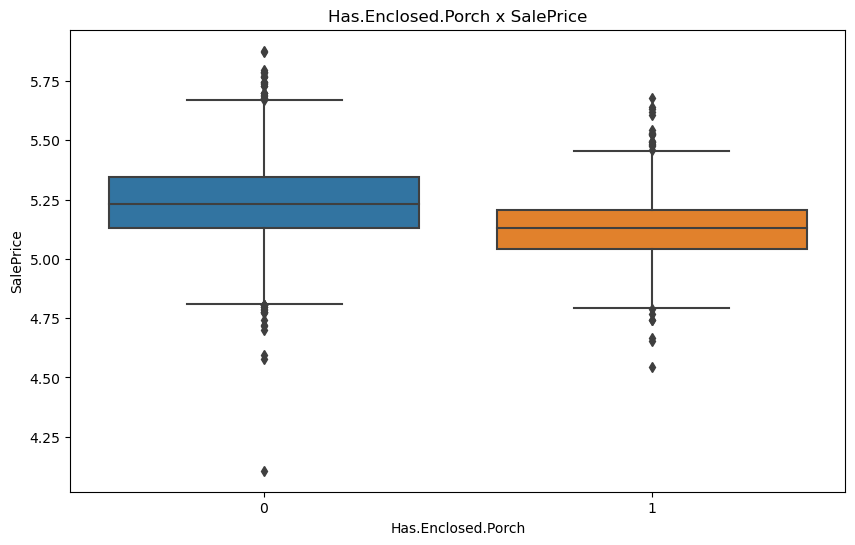

In [584]:
plt.figure(figsize=(10, 6))
plt.title('Has.Enclosed.Porch x SalePrice')
sns.boxplot(x='Has.Enclosed.Porch', y='SalePrice', data=model_data)
plt.show()

#### `X3Ssn.Porch`

- 3Ssn Porch (Continuous): Three season porch area in square feet

A feature `X3Ssn.Porch` representa a área da varanda de três estações em pés quadrados. Podemos ver que aparetemente todas as casas não têm varanda de três estações. Será que vale a pena manter essa feature? Vamos verificar se existe alguma relação entre a feature `X3Ssn.Porch` e a feature `SalePrice`.

              count      mean        std  min  25%  50%  75%    max
X3Ssn.Porch  2877.0  2.610358  25.321811  0.0  0.0  0.0  0.0  508.0


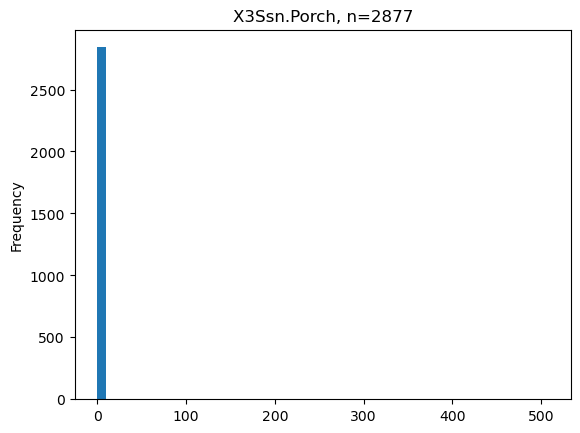

In [585]:
plot_numericals(model_data, ['X3Ssn.Porch'])

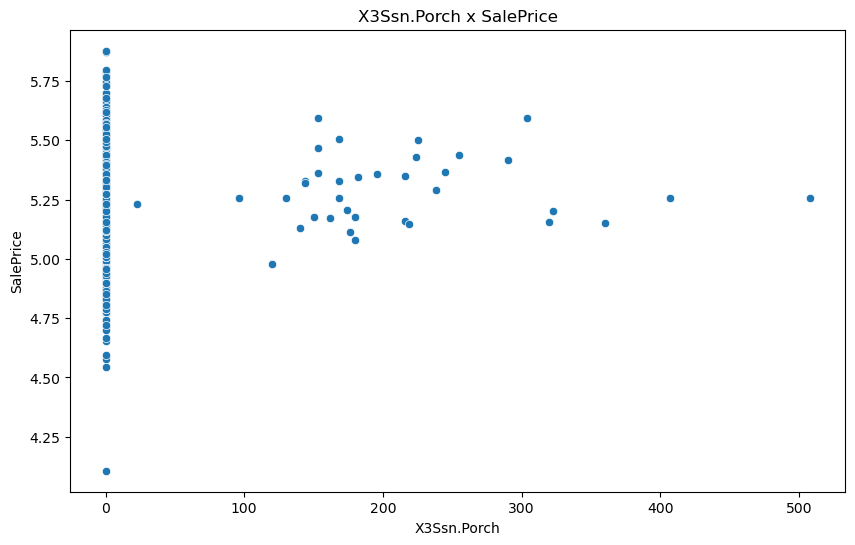

In [586]:
plt.figure(figsize=(10, 6))
plt.title('X3Ssn.Porch x SalePrice')
sns.scatterplot(x='X3Ssn.Porch', y='SalePrice', data=model_data)
plt.show()

Aparentemente não existe nenhuma relação entre a feature `X3Ssn.Porch` e a feature `SalePrice`. Portanto, podemos excluir a feature `X3Ssn.Porch`.

In [587]:
model_data.drop('X3Ssn.Porch', axis=1, inplace=True)

#### `Screen.Porch`

- Screen Porch (Continuous): Screen porch area in square feet

A feature `Screen.Porch` representa a área da varanda de tela em pés quadrados. Podemos ver que aparetemente todas as casas não têm varanda de tela. Será que vale a pena manter essa feature? Vamos verificar se existe alguma relação entre a feature `Screen.Porch` e a feature `SalePrice`.

               count       mean       std  min  25%  50%  75%    max
Screen.Porch  2877.0  16.262426  56.53912  0.0  0.0  0.0  0.0  576.0


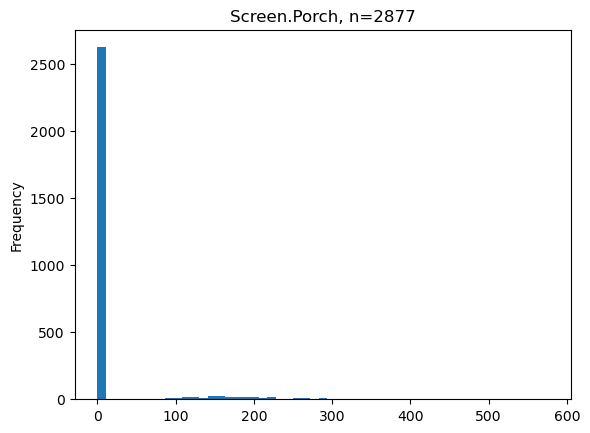

In [588]:
plot_numericals(model_data, ['Screen.Porch'])

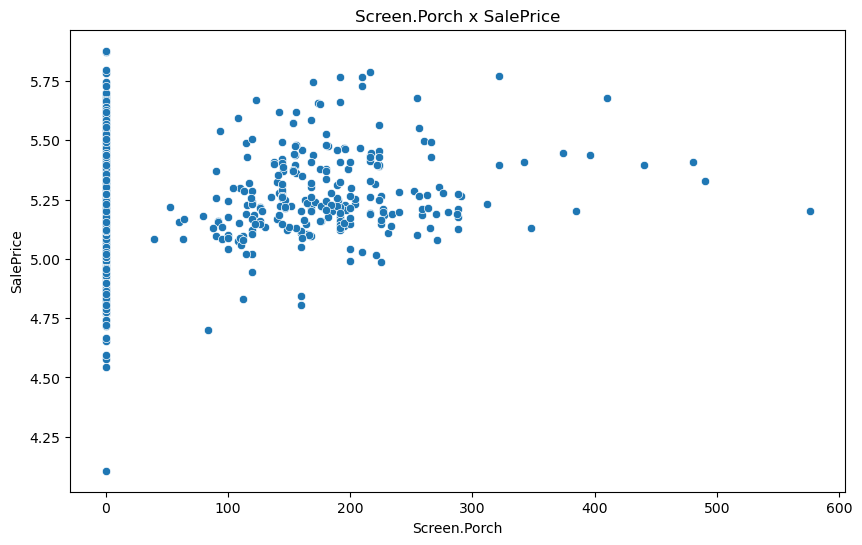

In [589]:
plt.figure(figsize=(10, 6))
plt.title('Screen.Porch x SalePrice')
sns.scatterplot(x='Screen.Porch', y='SalePrice', data=model_data)
plt.show()

Aparentemente não existe nenhuma relação entre a feature `Screen.Porch` e a feature `SalePrice`. Portanto, podemos excluir a feature `Screen.Porch`.

In [590]:
model_data.drop('Screen.Porch', axis=1, inplace=True)

#### `Pool.Area`

- Pool Area (Continuous): Pool area in square feet

A feature `Pool.Area` representa a área da piscina em pés quadrados. Podemos ver que aparetemente todas as casas não têm piscina. Será que vale a pena manter essa feature? Vamos verificar se existe alguma relação entre a feature `Pool.Area` e a feature `SalePrice`.

            count      mean        std  min  25%  50%  75%    max
Pool.Area  2877.0  2.284672  35.922368  0.0  0.0  0.0  0.0  800.0


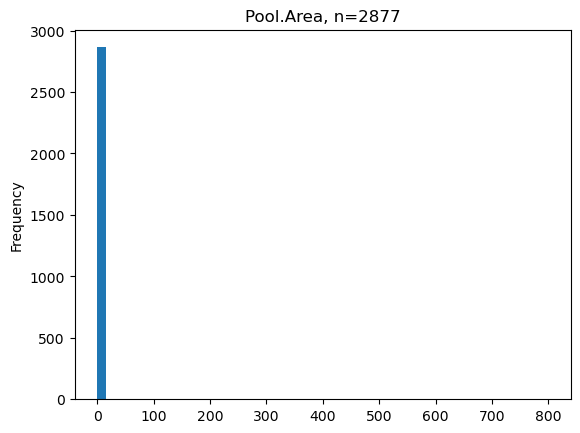

In [591]:
plot_numericals(model_data, ['Pool.Area'])

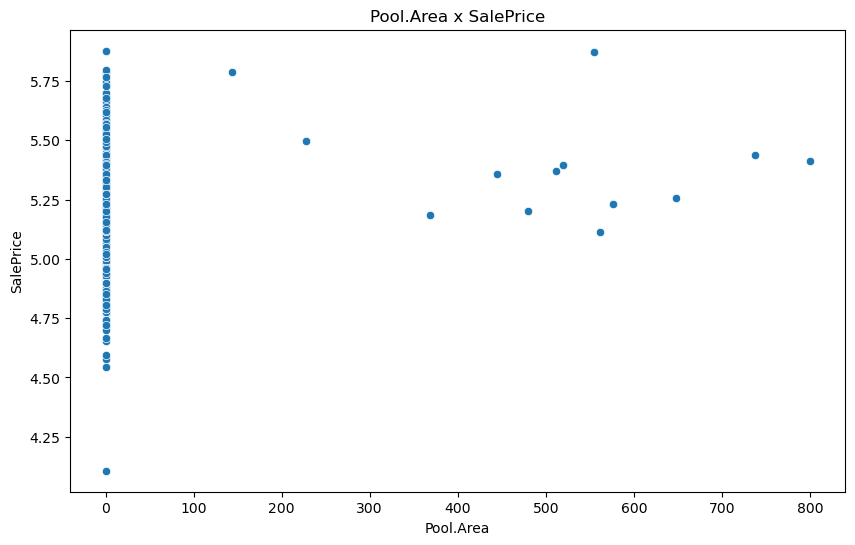

In [592]:
plt.figure(figsize=(10, 6))
plt.title('Pool.Area x SalePrice')
sns.scatterplot(x='Pool.Area', y='SalePrice', data=model_data)
plt.show()

Aparentemente não existe nenhuma relação entre a feature `Pool.Area` e a feature `SalePrice`. Portanto, podemos excluir a feature `Pool.Area`.

In [593]:
model_data.drop('Pool.Area', axis=1, inplace=True)

#### `Misc.Val`

- Misc Val (Continuous): $Value of miscellaneous feature

A feature `Misc.Val` representa o valor de recursos diversos. Podemos ver que aparetemente todas as casas não têm recursos diversos. Será que vale a pena manter essa feature? Vamos verificar se existe alguma relação entre a feature `Misc.Val` e a feature `SalePrice`.

           count       mean         std  min  25%  50%  75%      max
Misc.Val  2877.0  51.354536  571.419703  0.0  0.0  0.0  0.0  17000.0


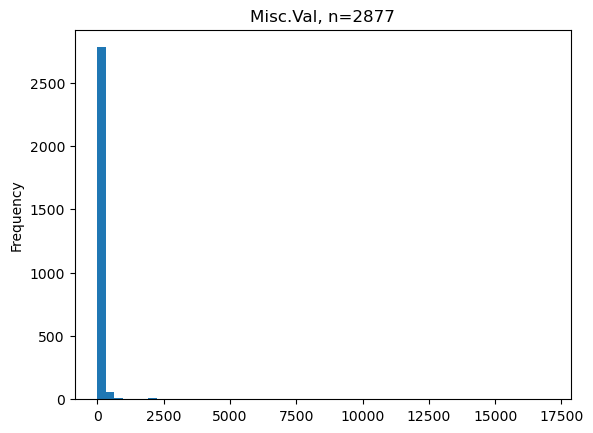

In [594]:
plot_numericals(model_data, ['Misc.Val'])

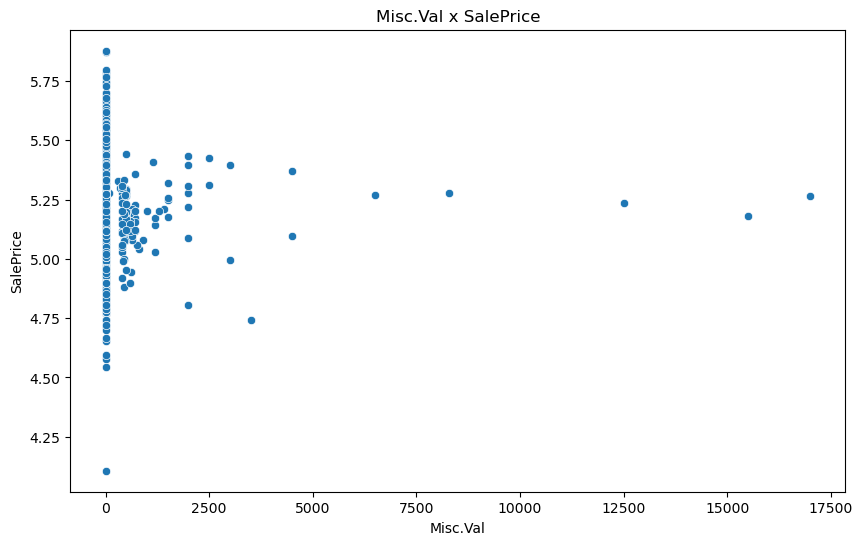

In [595]:
plt.figure(figsize=(10, 6))
plt.title('Misc.Val x SalePrice')
sns.scatterplot(x='Misc.Val', y='SalePrice', data=model_data)
plt.show()

Aparentemente não existe nenhuma relação entre a feature `Misc.Val` e a feature `SalePrice`. Portanto, podemos excluir a feature `Misc.Val`. A feature `Misc.Feature` representa o tipo de recurso diverso. Ela já havia sido excluída anteriormente, criando outras features binárias.

In [596]:
model_data.drop('Misc.Val', axis=1, inplace=True)

O restante das features numéricas já foram tratadas anteriormente. 

#### 2.2. Features categóricas
TODO:
- [ ] Tratar valores faltantes
- [ ] Tratar outliers
- [ ] Criar novas features que façam sentido
- [ ] Explicações e análises
- [ ] **FAZER ENCODING**

#### 2.3. Features ordinais
TODO:
- [ ] Tratar valores faltantes
- [ ] Tratar outliers
- [ ] Criar novas features que façam sentido
- [ ] Explicações e análises
- [ ] **FAZER ENCODING**

### 3. Modelagem
- [ ] Train-test split
- [ ] Escolha de métrica de avaliação
- [ ] Escolha de modelo
- [ ] Tuning de hiperparâmetros

### Train Test Split

In [153]:
def split_features_target(df):
    target_column = 'SalePrice'
    X = df.drop(columns=[target_column]).copy()
    y = df[target_column].copy()
    return X, y


In [154]:
X, y = split_features_target(model_data)

In [166]:
# train test validation split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)


(1840, 69) (576, 69) (461, 69)


In [167]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

### ISOLANDO OS ATRIBUTOS NUMÉRICOS E CATEGÓRICOS ###
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_cat = X_train.select_dtypes(include=['category']).astype('str')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        # Nota: include_bias=False porque o bias (termo constante) já estará incluso no regressor linear.
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ])

cat_pipeline = Pipeline([
        #Nota: drop='first' para evitar a colinearidade que não funcionaria com um modelo de regressão linear 
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')),
    ])

### TRANSFORMAÇÃO DOS ATRIBUTOS NUMÉRICOS E CATEGÓRICOS ###
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X_train = X_train_num.join(X_train_cat)

### APLICAÇÃO DA TRANSFORMAÇÃO ###
X_train_prepared = full_pipeline.fit_transform(X_train)

c:\Users\tutuc\anaconda3\envs\ames\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [168]:
# grid search com LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'fit_intercept': [True, False]}
]

lin_reg = LinearRegression()
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_lin_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'fit_intercept': True}
LinearRegression()


In [169]:
# grid search com RidgeCV
param_grid = [
    {'fit_intercept': [True, False],
     'alphas': [np.logspace(-4, 2, 10)]}
]

ridge_reg = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10], cv=5, scoring='neg_mean_squared_error')
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_ridge_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.alpha_)
print(grid_search.best_estimator_.intercept_)
print(grid_search.best_estimator_.coef_)
print(grid_search.best_estimator_.coef_.shape)


{'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'fit_intercept': True}
RidgeCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
        cv=5, scoring='neg_mean_squared_error')
100.0
5.161926306348965
[ 6.40534718e-03  8.93983129e-03 -2.26571634e-04  1.34798249e-02
 -6.18507435e-04  1.30387633e-03  1.98672514e-02  2.01295394e-02
  1.35465933e-02 -1.05891492e-03  2.69391429e-02  4.32615711e-03
 -8.15351314e-05  1.10660595e-02  9.28332673e-03 -3.28064396e-03
 -4.78251813e-03  5.95313945e-03  1.10049922e-02  1.08727054e-02
  5.47394387e-03  5.71063814e-03  4.99060791e-03  2.18219553e-03
  7.39207924e-04  5.80840596e-03  1.10814141e-04 -1.51632709e-03
  8.50271639e-04 -1.90189012e-04 -1.06510184e-02 -1.624414

In [170]:
# grid search com LassoCV
param_grid = [
    {'fit_intercept': [True, False],
     'alphas': [np.logspace(-4, 2, 10)]}
]

lasso_reg = LassoCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10], cv=5, max_iter=10000, tol=0.01, random_state=42)
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_lasso_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.alpha_)
print(grid_search.best_estimator_.intercept_)
print(grid_search.best_estimator_.coef_)
print(grid_search.best_estimator_.coef_.shape)



{'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'fit_intercept': True}
LassoCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
        cv=5, max_iter=10000, random_state=42, tol=0.01)
0.00046415888336127773
5.14981677181216
[ 4.47250591e-03  9.16327989e-03  0.00000000e+00  1.40883335e-02
 -0.00000000e+00 -5.05048586e-04  1.92671581e-02  3.48915711e-02
  3.17035295e-02  0.00000000e+00  2.54193019e-02  2.97256689e-03
  0.00000000e+00  6.55887420e-03  4.77214385e-03 -3.40260817e-03
 -2.50376490e-03  0.00000000e+00  9.03478953e-03  1.69185631e-02
  0.00000000e+00  3.81225978e-03  4.13488319e-03  1.33780277e-03
  0.00000000e+00  4.82379764e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 

In [171]:
# grid search com ElasticNetCV

param_grid = [
    {'fit_intercept': [True, False],
     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
     'alphas': [np.logspace(-4, 2, 10)]}
]

elastic_net_reg = ElasticNetCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10], cv=5, max_iter=10000, tol=0.01, random_state=42)
grid_search = GridSearchCV(elastic_net_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

best_elastic_net_reg = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.alpha_)
print(grid_search.best_estimator_.l1_ratio_)
print(grid_search.best_estimator_.intercept_)
print(grid_search.best_estimator_.coef_)
print(grid_search.best_estimator_.coef_.shape)



{'alphas': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]), 'fit_intercept': True, 'l1_ratio': 0.5}
ElasticNetCV(alphas=array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
             cv=5, max_iter=10000, random_state=42, tol=0.01)
0.00046415888336127773
0.5
5.143536608185546
[ 5.13375933e-03  9.99323429e-03 -0.00000000e+00  1.20626335e-02
 -0.00000000e+00 -2.06352297e-03  2.00723381e-02  3.55421375e-02
  3.18413104e-02  0.00000000e+00  2.22922216e-02  2.39614188e-03
  0.00000000e+00  6.61720992e-03  5.79570835e-03 -3.45243804e-03
 -3.39604775e-03  0.00000000e+00  8.16723750e-03  1.51640320e-02
  8.01393131e-05  4.97623292e-03  3.93248131e-03  1.34885542e-03
  0.00000000e+00  4.99644334e-03  0.00000000e+00  0.00000000e+00
 

### 4. Avaliação do Desempenho
TODO:
- [ ] Avaliação do desempenho de diferentes modelos
- [ ] Análise de resíduos
- [ ] Análise de importância de features

In [172]:
# Avaliação dos modelos
from sklearn.metrics import mean_squared_error, accuracy_score

def evaluate_model(model, X, y):
    X_prepared = full_pipeline.transform(X)
    y_pred = model.predict(X_prepared)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    accuracy = model.score(X_prepared, y)
    return rmse, accuracy

print('LinearRegression')
print(evaluate_model(best_lin_reg, X_train, y_train))

print('RidgeCV')
print(evaluate_model(best_ridge_reg, X_train, y_train))

print('LassoCV')
print(evaluate_model(best_lasso_reg, X_train, y_train))

print('ElasticNetCV')
print(evaluate_model(best_elastic_net_reg, X_train, y_train))



LinearRegression
(0.03185950424807982, 0.9655606669145289)
RidgeCV
(0.042416599834128994, 0.9389552373469494)
LassoCV


(0.04376835693011, 0.9350024192276563)
ElasticNetCV
(0.03907497515479641, 0.948194707922156)


In [173]:
# Avaliação dos modelos com validação cruzada
from sklearn.model_selection import cross_val_score

def evaluate_model_cv(model, X, y):
    X_num = X.select_dtypes(include=[np.number])
    X_cat = X.select_dtypes(include=['category', 'object']).astype('str')
    X = X_num.join(X_cat)
    X_prepared = full_pipeline.transform(X)
    scores = cross_val_score(model, X_prepared, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())
    return rmse_scores

print('LinearRegression')
rmse_scores_lin_reg = evaluate_model_cv(best_lin_reg, X_train, y_train)

print('RidgeCV')
rmse_scores_ridge_reg = evaluate_model_cv(best_ridge_reg, X_train, y_train)

print('LassoCV')
rmse_scores_lasso_reg = evaluate_model_cv(best_lasso_reg, X_train, y_train)

print('ElasticNetCV')
rmse_scores_elastic_net_reg = evaluate_model_cv(best_elastic_net_reg, X_train, y_train)



LinearRegression
Scores: [0.06935585 0.16403259 0.08562699 0.14637662 0.16329437]
Mean: 0.12573728469908757
Standard deviation: 0.040226232484949026
RidgeCV
Scores: [0.06552335 0.05743423 0.1117982  0.069768   0.05947771]
Mean: 0.07280029917140399
Standard deviation: 0.019982956201711363
LassoCV
Scores: [0.056415   0.05226404 0.07029371 0.06463281 0.04986178]
Mean: 0.05869346869900512
Standard deviation: 0.007672926776194262
ElasticNetCV
Scores: [0.05553473 0.0525827  0.06785847 0.06152929 0.05213417]
Mean: 0.05792787019730796
Standard deviation: 0.0059908591213740795


Escolha entre LASSO e ElasticNet

In [174]:
from scipy.stats import mannwhitneyu
U, pvalue = mannwhitneyu(rmse_scores_lin_reg, rmse_scores_ridge_reg)
print('LinearRegression vs RidgeCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_lin_reg, rmse_scores_lasso_reg)
print('LinearRegression vs LassoCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_lin_reg, rmse_scores_elastic_net_reg)
print('LinearRegression vs ElasticNetCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_ridge_reg, rmse_scores_lasso_reg)
print('RidgeCV vs LassoCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_ridge_reg, rmse_scores_elastic_net_reg)
print('RidgeCV vs ElasticNetCV')
print(pvalue)

U, pvalue = mannwhitneyu(rmse_scores_lasso_reg, rmse_scores_elastic_net_reg)
print('LassoCV vs ElasticNetCV')
print(pvalue)




LinearRegression vs RidgeCV
0.05555555555555555
LinearRegression vs LassoCV
0.015873015873015872
LinearRegression vs ElasticNetCV
0.007936507936507936
RidgeCV vs LassoCV
0.2222222222222222
RidgeCV vs ElasticNetCV
0.15079365079365079
LassoCV vs ElasticNetCV
1.0


In [179]:
# Tendo o melhor modelo, treinar com todos os dados de treino e avaliar com os dados de teste
from sklearn.metrics import mean_squared_error, accuracy_score

best_model = best_elastic_net_reg

X_test_num = X_test.select_dtypes(include=[np.number])
X_test_cat = X_test.select_dtypes(include=['category', 'object']).astype('str')

X_test_prepared = X_test_num.join(X_test_cat)

X_test_prepared = full_pipeline.transform(X_test_prepared)

y_pred = best_model.predict(X_test_prepared)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = best_model.score(X_test_prepared, y_test)

print(rmse)
print(accuracy)



0.05296772675492641
0.9049801435365025


c:\Users\tutuc\anaconda3\envs\ames\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
